In [108]:
#Tensorflow and tf Keras
import tensorflow as tf
from tensorflow import keras

In [109]:
#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


In [110]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [111]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [112]:
train_images.shape

(60000, 28, 28)

In [113]:
len(train_labels)

60000

In [114]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [115]:
test_images.shape

(10000, 28, 28)

In [116]:
len(test_labels)

10000

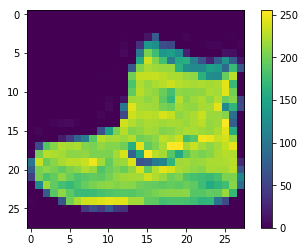

In [117]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [118]:
train_images = train_images/ 255.0
test_image = test_images/ 255.0


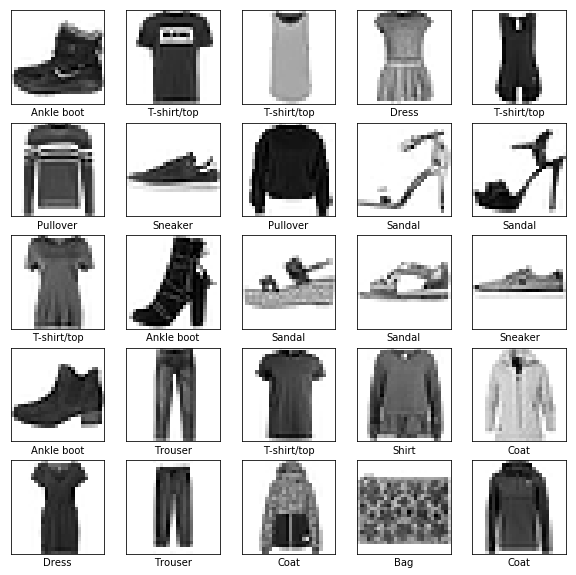

In [119]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [120]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [121]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [122]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.4983 - acc: 0.8258
Epoch 2/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.3742 - acc: 0.8649
Epoch 3/5
60000/60000 [==============================] - ETA: 0s - loss: 0.3362 - acc: 0.878 - 2s 37us/step - loss: 0.3359 - acc: 0.8785
Epoch 4/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.3134 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.2949 - acc: 0.8911


In [123]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test acc = ', test_acc)

10000/10000 [==============================] - 0s 20us/step
Test acc =  0.862


In [124]:
predictions = model.predict(test_images)

In [125]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [126]:
np.argmax(predictions[0])

9

In [127]:
test_labels[0]

9

In [128]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    predict_label = np.argmax(predictions_array)
    if predict_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predict_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                          color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

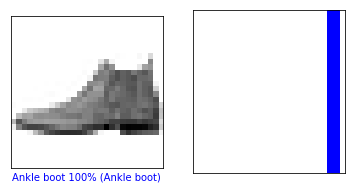

In [129]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

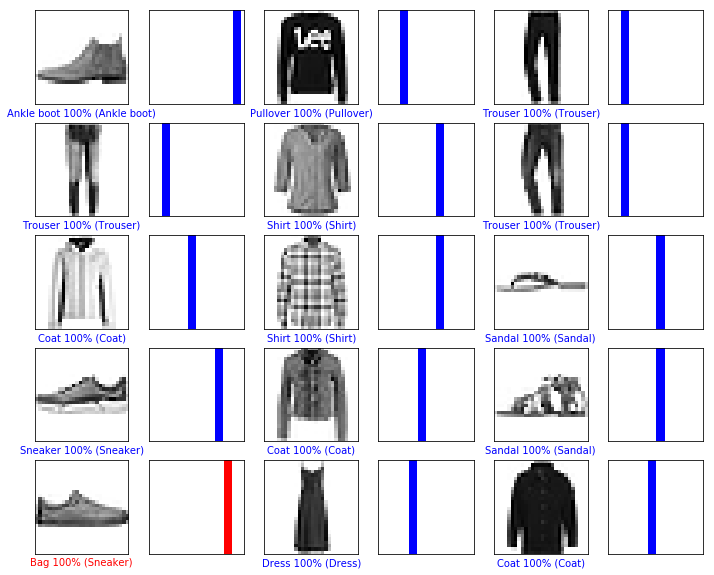

In [130]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [131]:
# Grab an image from the test dataset
img = test_images[0]
print(img.shape)

(28, 28)


In [132]:
# Add the image to a batch where it's the only member
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [133]:
predictions_single = model.predict(img)
print(predictions_single)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


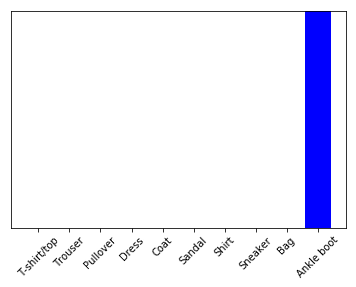

In [134]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

In [135]:
np.argmax(predictions_single[0])

9